<h1>Assignment 3: Model Interpretability</h1>
Author: Aashay Pawar

NUID: 002134382

Interpret your models.

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

<h3>About the Dataset:</h3>

The dataset contains various details about vehicles, including car name, price in rupees, kilometers driven, fuel type, transmission type, ownership status, manufacture year, engine specifications, and number of seats. It is an open dataset that can be accessed on Kaggle, and a snapshot of the same dataset is also available on my GitHub page. The file is in CSV format, which makes it easy to import and analyze using various software tools.

Kaggle: https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction

Github: https://github.com/pawar-aa/NFO6105-33201-Data-Sci-Eng-Methods

<h3>Index (What happened in the below code?)</h3>

1.   All libraries are imported, missing modules were installed
2.   Dataset was loaded in pandas dataframe
2.   Data cleaning and prosecc was done
3.   Data was split into training and testing sets
4.   Task 1: Fit a linear model and interpret the regression coefficients
5.   Task 2: Fit a tree-based model and interpret the nodes
6.   Task 3: Use auto ml to find the best model
7.   Task 4: Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.





<h3> What is Model Interpretability?</h3>
Model interpretability refers to the ability to understand and explain the decisions or predictions made by a machine learning model. In other words, it is the degree to which a model's behavior or outputs can be explained in human terms.

Interpretability is important because it helps build trust in machine learning models, especially in high-stakes applications such as healthcare or finance. An interpretable model can help stakeholders understand how the model works, why it makes certain decisions, and how to improve it.

There are various techniques and methods for improving model interpretability, such as feature importance analysis and decision tree visualization. These techniques aim to extract meaningful insights from the model and present them in a way that is easily understandable for humans.

<h3>What is SHAP analysis?</h3>
SHAP (SHapley Additive exPlanations) analysis is a method for explaining the predictions of machine learning models. It provides a way to attribute the contribution of each feature or input variable to the final output of the model.

SHAP analysis is based on the concept of Shapley values from cooperative game theory. In cooperative game theory, Shapley values are used to allocate the payoff of a game to each player based on their contribution to the game. In the context of machine learning models, the game is the prediction task, and the players are the input features. The SHAP values represent the contribution of each feature to the prediction, taking into account the interactions between the features.

The SHAP analysis algorithm computes the SHAP values for each input feature by considering all possible combinations of features and their contributions to the prediction. The SHAP values can be used to explain the predictions of any machine learning model, including black-box models such as deep neural networks.

SHAP analysis can be used to answer questions such as "Why did the model make this prediction?" or "Which features were most important for the prediction?" This information can be useful for improving the model's performance, detecting bias, and building trust in the model's predictions.

In [56]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
pip install sklearn_pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [60]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/pawar-aa/NFO6105-33201-Data-Sci-Eng-Methods/main/car_price.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


In [61]:
# CAR PRICE
# iterate over each value in the 'car_prices_in_rupee' column
for i, value in enumerate(df['car_prices_in_rupee']):
        # check if the value contains 'Lakh'
        if 'Lakh' in value:
            # replace 'Lakh' with an empty string
            value = value.replace('Lakh', '')
            # convert the value to a float
            value = int(float(value) * 100000)
        # check if the value contains 'Crore'
        elif 'Crore' in value:
            # replace 'Crore' with an empty string
            value = value.replace('Crore', '')
            # convert the value to a float
            value = int(float(value) * 10000000)
        # update the value in the dataframe
        df.at[i, 'car_prices_in_rupee'] = value
        
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].str.replace(',', '')
df['car_prices_in_rupee'] = pd.to_numeric(df['car_prices_in_rupee'], errors='coerce')
df.dropna(subset=['car_prices_in_rupee'], inplace=True)
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].astype('int64')

# KILOMETERS DRIVEN    
df['kms_driven'] = df['kms_driven'].str.replace('kms', '').str.replace(',', '').astype(int)

# FUEL TYPE
df['fuel_type'] = df['fuel_type'].str.replace('Cng', '0').str.replace('Diesel', '1').str.replace('Petrol', '2').str.replace('Electric', '3').str.replace('Lpg', '4').astype(int)

# TRANSMISSION TYPE
df['transmission'] = df['transmission'].str.replace('Manual', '0').str.replace('Automatic', '1').astype(int)

# OWNERSHIP TYPE    
df['ownership'] = df['ownership'].replace({'1st Owner': 1, '2nd Owner': 2,'3rd Owner': 3, '4th Owner': 4, '5th Owner': 5, '0th Owner': 0}).astype(int)

# ENGINE CAPACITY IN CC
df['engine'] = df['engine'].str.replace('cc', '').astype(int)

# NUMBER OF SEATS
df['Seats'] = df['Seats'].str.replace('Seats', '').astype(int)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 238 to 5439
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           123 non-null    int64 
 1   car_name             123 non-null    object
 2   car_prices_in_rupee  123 non-null    int64 
 3   kms_driven           123 non-null    int64 
 4   fuel_type            123 non-null    int64 
 5   transmission         123 non-null    int64 
 6   ownership            123 non-null    int64 
 7   manufacture          123 non-null    int64 
 8   engine               123 non-null    int64 
 9   Seats                123 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 10.6+ KB


In [63]:
# Split the dataframe into feature matrix X and target vector y
X = df.drop(['car_prices_in_rupee', 'car_name'], axis=1)
y = df['car_prices_in_rupee']

In [64]:
print(f"Mean value of median car prices in $: {round(y.mean(), 2)}")

Mean value of median car prices in $: 75773.5


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

<h1>Linear Regression</h1>

In [66]:
numerical_features = X_train.columns.tolist()
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num, df_out=True)
preprocessed_X_train = mapper.fit_transform(X_train)
preprocessed_X_train = sm.add_constant(preprocessed_X_train)
reg = sm.OLS(y_train, preprocessed_X_train).fit()

In [67]:
def evaluate(X, y, mapper=None, reg=None, transform=False):
    if transform:
        X = mapper.transform(X)
        X = sm.add_constant(X, has_constant='add') 
    y_pred = reg.predict(X)
    return mean_absolute_error(y, y_pred)

In [68]:
train_mae = evaluate(X_train, y_train, mapper, reg, True)
test_mae = evaluate(X_test, y_test, mapper, reg, True)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

train MAE = 12296.779, test MAE = 14200.012 


In [69]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     car_prices_in_rupee   R-squared:                       0.174
Model:                             OLS   Adj. R-squared:                  0.109
Method:                  Least Squares   F-statistic:                     2.666
Date:                 Thu, 30 Mar 2023   Prob (F-statistic):             0.0107
Time:                         03:17:21   Log-Likelihood:                -1214.7
No. Observations:                  110   AIC:                             2447.
Df Residuals:                      101   BIC:                             2472.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.642e+04   1504.672     50.790      0.000    7.34e+04    7.94e+04
Unnamed: 0   -2279.4768   1575.544     -1.447      0.151   -5404.932     845.978
kms_driven    2491.8267   1621.612      1.537      0.128    -725.015    5708.668
fuel_type      -59.9282   1582.020     -0.038      0.970   -3198.230    3078.373
transmission  1854.2804   1577.029      1.176      0.242   -1274.121    4982.682
ownership     -478.0621   1602.645     -0.298      0.766   -3657.279    2701.155
manufacture   7067.0360   1655.289      4.269      0.000    3783.388    1.04e+04
engine       -2234.0468   1561.611     -1.431      0.156   -5331.862     863.769
Seats         -899.3877   1580.085     -0.569      0.570   -4033.851    2235.076
==============================================================================
Omnibus:                        6.051   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                4.149
Skew:                          -0.327   Prob(JB):                        0.126
Kurtosis:                       2.309   Cond. No.                         1.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1>Random Forest</h1>

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
numerical_features = X_train.columns.tolist()
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num, df_out=True)
reg = RandomForestRegressor()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

train_mae = evaluate(X_train, y_train, reg=pipeline)
test_mae = evaluate(X_test, y_test, reg=pipeline)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

train MAE = 5103.561, test MAE = 12353.607 


<BarContainer object of 8 artists>

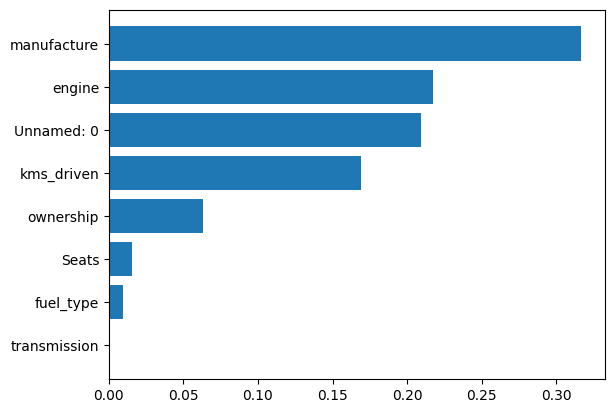

In [71]:
sorted_idx = reg.feature_importances_.argsort()
features = numerical_features
result = sorted(zip(features, reg.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

<h1>Neural Networks</h1>

In [72]:
from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.optim as optim

preprocessed_X_train = mapper.fit_transform(X_train)

num_epochs = 50
learning_rate = 0.01
hidden_size = 32
batch_size = 50
input_dim = preprocessed_X_train.shape[1]
batch_no = preprocessed_X_train.shape[0] // batch_size
model = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.Linear(hidden_size, 1)
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        x_batch = Variable(torch.FloatTensor(preprocessed_X_train.values[start:end]))
        y_batch = Variable(torch.FloatTensor(y_train.values[start:end]))
        optimizer.zero_grad()
        y_preds = model(x_batch)
        loss = criterion(y_preds, torch.unsqueeze(y_batch,dim=1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 10 == 0: 
        print("Epoch {}, Loss: {}".format(epoch, running_loss))
        
preprocessed_X_test = mapper.transform(X_test)
y_pred = model(torch.from_numpy(preprocessed_X_test.values).float()).flatten().detach().numpy()
test_mae = mean_absolute_error(y_test, y_pred)
preprocessed_X_train = mapper.transform(X_train)
y_pred = model(torch.from_numpy(preprocessed_X_train.values).float()).flatten().detach().numpy()
train_mae = mean_absolute_error(y_train, y_pred)
print(f"\ntrain MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

Epoch 0, Loss: 12381891072.0
Epoch 10, Loss: 12381318144.0
Epoch 20, Loss: 12379901440.0
Epoch 30, Loss: 12376819712.0
Epoch 40, Loss: 12371558912.0

train MAE = 76366.627, test MAE = 70235.886 


We don't have a direct way to identify feature importance for neural networks.

<h1>Problems with Interpretation</h1>

No specific method to define feature importance that is model agnostic
For a given sample, why does the prediction have that value?
Answer: Shap values


<h1>Intuition of Model Interpretation</h1>
How we think about answering the question "Why is the output for this specific sample so low/high" manually?

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
numerical_features = [c for c in X_train.columns]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num, df_out=True)
reg = LinearRegression()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

In [74]:
nan_frame = pd.DataFrame(columns=numerical_features, index=[0])
nan_frame

,Unnamed: 0,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
base_value = round(pipeline.predict(nan_frame)[0], 3)
print(f"Expected value of the output (base value): {base_value}")

Expected value of the output (base value): 76421.609


In [76]:
X_test.iloc[0: 1]

,Unnamed: 0,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
4668,4668,50000,2,0,2,2011,1390,5


In [77]:
sample_prediction = round(pipeline.predict(X_test.iloc[0: 1])[0], 3)
print(f"Current Prediction: {sample_prediction}")

Current Prediction: 79463.639




1.   Expected value of the output (base value): 76421.609
2.   Current Prediction: 79463.639



<h1>Partial Dependence Plots</h1>

In [78]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

In [79]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature, 
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

In [80]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
238,238,Maruti Swift 1.3 LXI,99999,80000,2,0,3,2007,1298,5
243,243,Maruti Zen LX,55000,90000,2,0,3,2002,993,5
342,342,Maruti Alto LXi BSIII,84778,70229,2,0,4,2008,796,5
675,675,Maruti Esteem VX - BSII,59000,60000,2,0,1,2007,1497,5
734,734,Hyundai Santro Xing GL,90000,80000,2,0,2,2008,2993,5


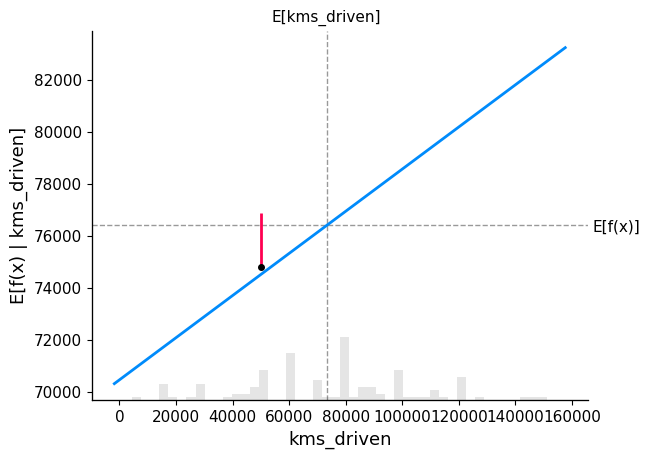

In [81]:
partial_dependence_plot('kms_driven', 0)

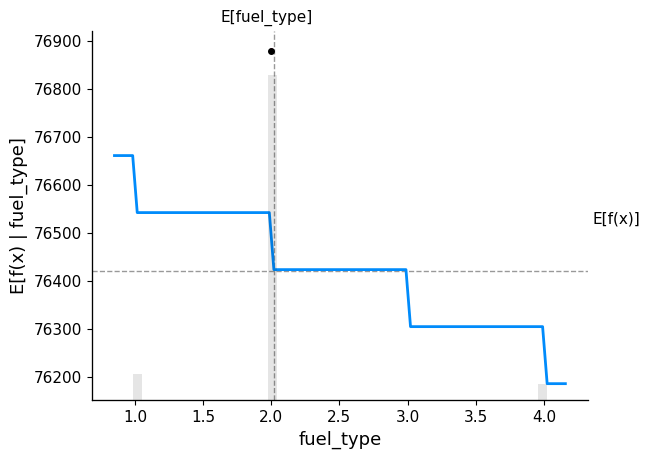

In [82]:
partial_dependence_plot('fuel_type', 0)

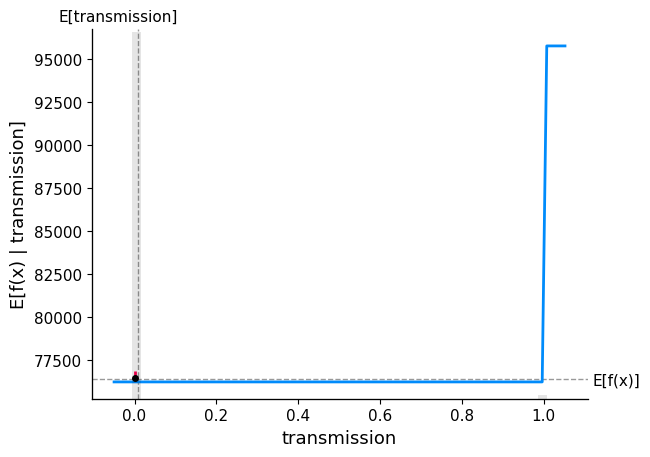

In [83]:
partial_dependence_plot('transmission', 0)

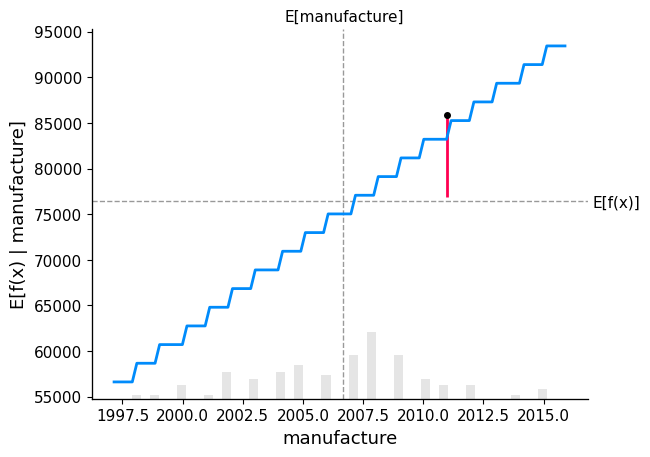

In [84]:
partial_dependence_plot('manufacture', 0)

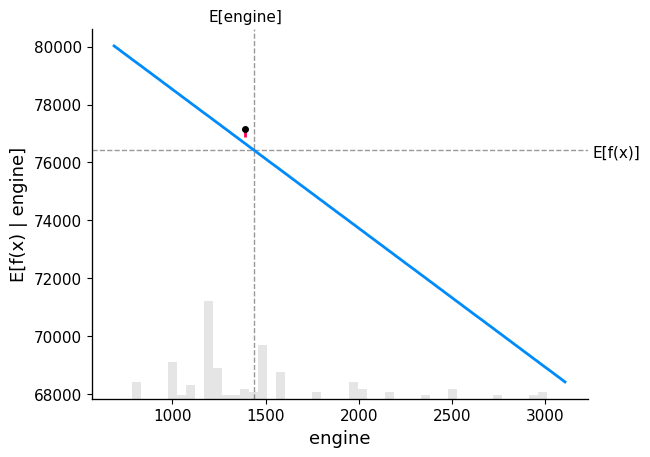

In [85]:
partial_dependence_plot('engine', 0)

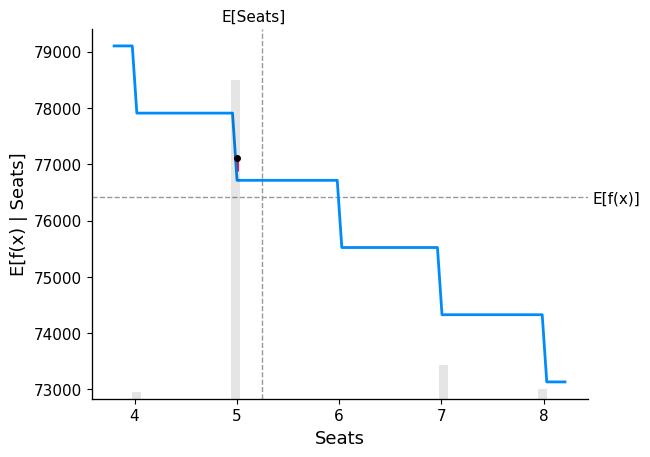

In [86]:
partial_dependence_plot('Seats', 0)

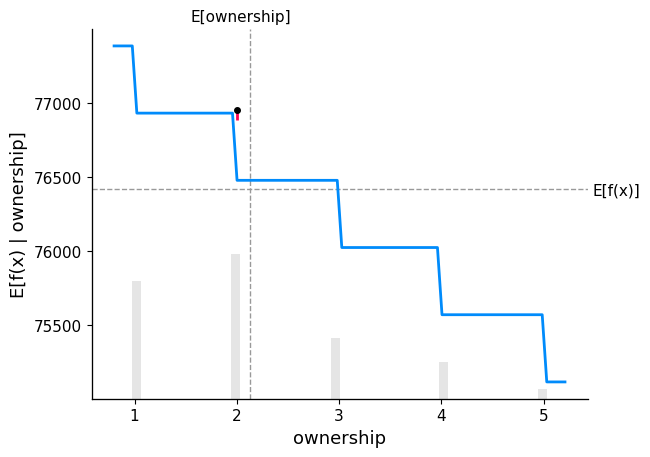

In [87]:
partial_dependence_plot('ownership', 0)

<h1>Shap Plots</h1>
Lets look at all features of the same sample.

In [88]:
shap.initjs()

In [89]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

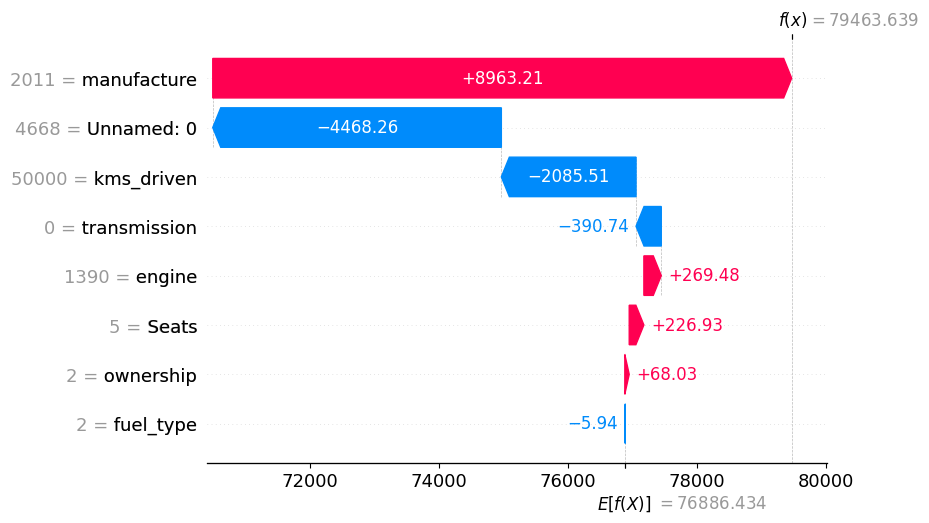

In [90]:
sample_feature_importance(0, 'waterfall')

In [91]:
sample_feature_importance(0, 'condensed')

<h1>Feature Importance for model</h1>
Let's look at all samples together.

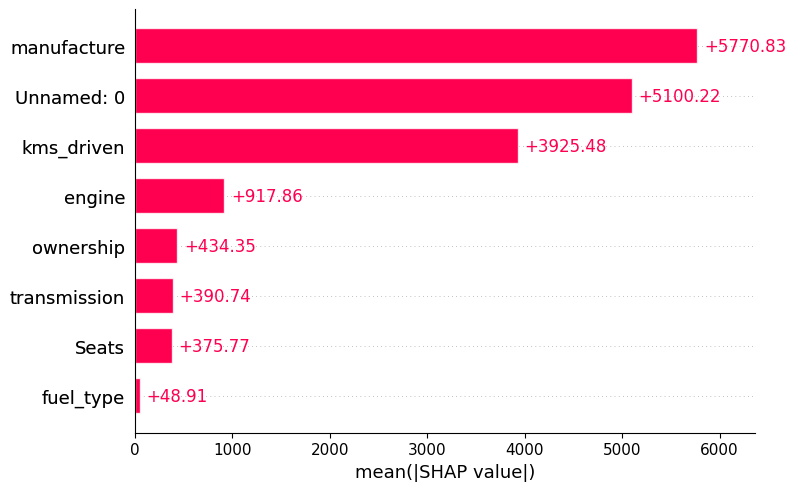

In [92]:
shap.plots.bar(shap_values)

Two most important features according to the LinearRegression model:

1.   manufacture (Year of manufacture)
2.   kms_driven (Kilometers driven till date)



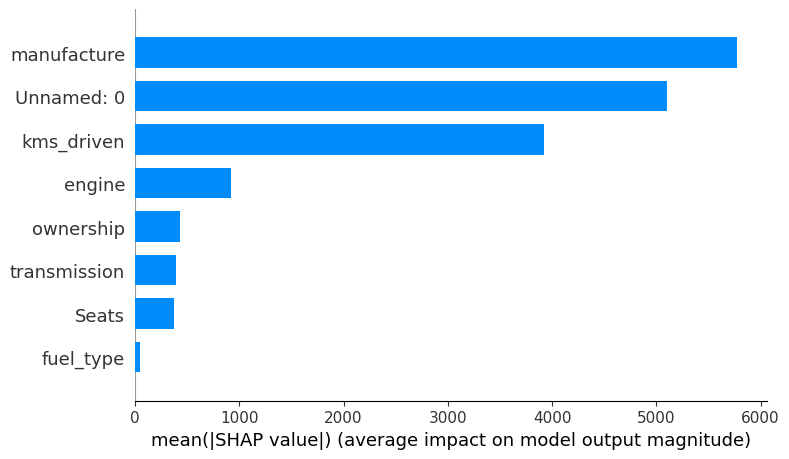

In [93]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

We can interpret the neural network model in the same way

In [94]:
preprocessed_X_train = mapper.fit_transform(X_train)

num_epochs = 50
learning_rate = 0.01
hidden_size = 32
batch_size = 50
input_dim = preprocessed_X_train.shape[1]
batch_no = preprocessed_X_train.shape[0] // batch_size
model = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.Linear(hidden_size, 1)
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        x_batch = Variable(torch.FloatTensor(preprocessed_X_train.values[start:end]))
        y_batch = Variable(torch.FloatTensor(y_train.values[start:end]))
        optimizer.zero_grad()
        y_preds = model(x_batch)
        loss = criterion(y_preds, torch.unsqueeze(y_batch,dim=1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 10 == 0: 
        print("Epoch {}, Loss: {}".format(epoch, running_loss))
        
preprocessed_X_test = mapper.transform(X_test)
y_pred = model(torch.from_numpy(preprocessed_X_test.values).float()).flatten().detach().numpy()
test_mae = mean_absolute_error(y_test, y_pred)
preprocessed_X_train = mapper.transform(X_train)
y_pred = model(torch.from_numpy(preprocessed_X_train.values).float()).flatten().detach().numpy()
train_mae = mean_absolute_error(y_train, y_pred)
print(f"\ntrain MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

Epoch 0, Loss: 12381776896.0
Epoch 10, Loss: 12381097984.0
Epoch 20, Loss: 12379523584.0
Epoch 30, Loss: 12376392192.0
Epoch 40, Loss: 12371259392.0

train MAE = 76366.957, test MAE = 70245.61 


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


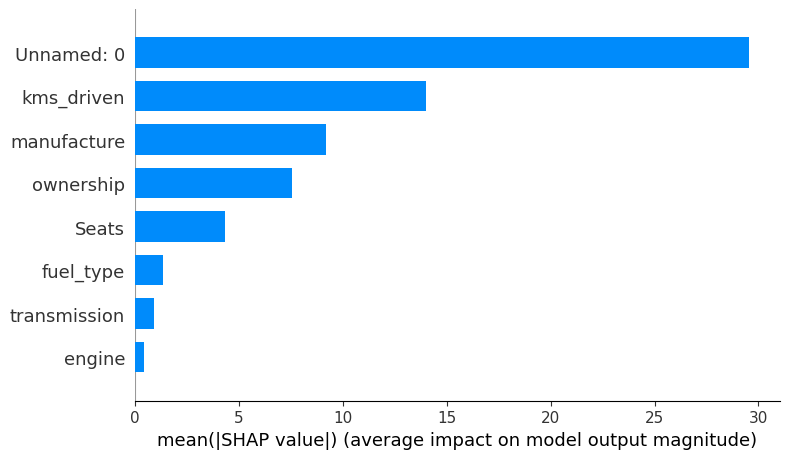

In [95]:
explainer = shap.DeepExplainer(model, torch.from_numpy(preprocessed_X_train.values).float())
shap_values = explainer.shap_values(torch.from_numpy(preprocessed_X_test.values).float())
shap.summary_plot(shap_values, X_test, plot_type='bar')

Most important features for this neural network:


1.   kms_driven (Kilometers driven till date)
2.   ownership (Number of previous owners including current)
3.   manufacture (Year of manufacture)



**References:**


1. https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction/code
2. https://www.w3schools.com/python/pandas/
3. https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb


MIT License

Copyright (c) 2023 Aashay Pawar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.